# Data Visualization for Royal Road Schemas

CSV Format:
`crossover_id, run_id, generation, avg_fitness, best_fitness, schema1_count, schema2_count, ..., scheman_count`

## Research Questions

1. What crossover mechanism leads to the most diverse set of building blocks during evolution?
2. What crossover mechanism minimizes the average number of generations to find an optimal solution?
2. What crossover mechanism is least likely to have building blocks "die out" of the population?

## Notebook Philosophy

I have *strong* opinions about notebooks. This should be used by:

a) updating values in the first couple blocks

b) running the whole thing top to bottom

c) seeing the results at the end
 
You do not need to interact with anthing in between, and it's fully able to be looped by modifying those global variables.

Other behavior added should adhere to this atomic/hands-off style for notebooks rather than building large, interactive pipelines.

In [388]:
GENS = 2000
RUNS = 50
POP = 128
RR = 1 # 1 or 2 for whichever royal road
BLOCKS = 8 if RR == 1 else 14

In [389]:
crossover = '2' # from 'U', '1', '2'
xrate = 1.0 # from 0.5, 0.7, 1.0

Change the blocks above to ensure parameters match the parameters used in the experiment. Everything else will be dynamically calculated from there.

In [390]:
import pandas as pd
import matplotlib.pyplot as plt

In [391]:
csv_file_name = f'../data/rr{'1' if RR == 1 else '2'}/royalroad{'' if RR == 1 else '2'}_{'uni' if crossover == "U" else ('1pt' if crossover == "1" else "2pt")}_{'50' if xrate == 0.5 else ('70' if xrate == 0.7 else '100')}_stats.csv'

In [392]:
def rotate_2d_array(arr):
    arr = list(reversed(arr))
    transposed_arr = list(zip(*arr))
    rotated_arr = [list(row)[::-1] for row in transposed_arr]
    return rotated_arr

In [393]:
blue = "#1f77b4"
orange = "#ff7f0e"
green = "#2ca02c"
red = "#d62728"
purple = "#9467bd"
brown = "#8c564b"
pink = "#e377c2"
amber = "#ffbb78"
gray = "#7f7f7f"
yellow = "#ffdb58"
cyan = "#00ffff"
magenta = "#ff00ff"
lime = "#00ff00"
teal = "#008080"
lavender = "#e6e6fa"
colors = [blue, orange, green, red, purple, brown, pink, gray, yellow, cyan, magenta, lime, teal, lavender][:BLOCKS]

In [394]:
df = pd.read_csv(csv_file_name)

/var/folders/8y/s54qb0v90pl6x459mymy5tw80000gp/T/ipykernel_1611/3692261436.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_name)


In [395]:
def get_schema_counts_by_gen(df, gen, schema):
    return df[df["generation"] == gen][schema].to_list()

In [396]:
# For each generation, create a list which has the percentage of each schema in the population
# at that generation across all runs.
average_schema_count_per_gen = [0 for i in range(GENS)]
for i in range(1, GENS+1):
    counts_across_runs = map(
        lambda s: get_schema_counts_by_gen(df, i, s),
        [f"schema{i}_count" for i in range(BLOCKS)],
    )
    sums_across_runs = map(
        lambda s: sum(s),
        counts_across_runs
    )
    average_across_runs = map(
        lambda s: s/RUNS,
        sums_across_runs
    )
    average_of_population = map(
        lambda s: s/POP,
        average_across_runs 
    )
    average_schema_count_per_gen[i-1] = list(average_of_population)

In [397]:
# We want to visualize generations on the x-axis and schema percentages on the y-axis.
# rather than generations on y, which is how the data was read
average_schema_count_per_schema = rotate_2d_array(average_schema_count_per_gen)

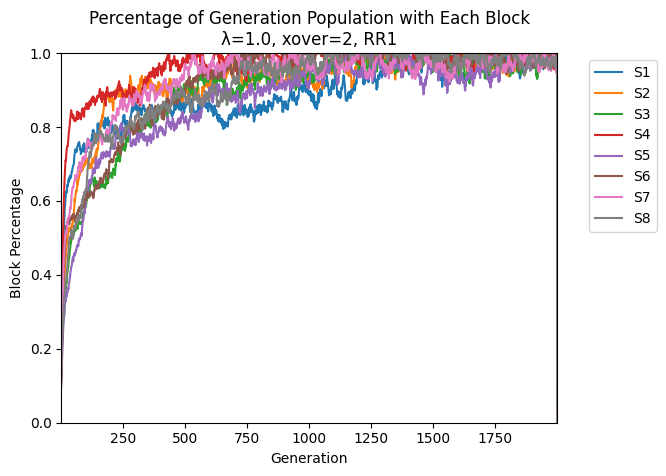

In [398]:
for i in range(len(colors[:BLOCKS])):
    plt.plot(range(1,GENS+1), average_schema_count_per_schema[i], color=colors[i], label='S' + str(i+1))

plt.xlabel("Generation")
plt.ylabel("Block Percentage")
plt.xticks(range(0,GENS, 250))
plt.title(f"Percentage of Generation Population with Each Block\nλ={xrate}, xover={crossover}, RR{RR}")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

plt.xlim(1, GENS)
plt.ylim(0, 1)

plt.savefig(
    f'rr{"1" if RR == 1 else "2"}/rr{"1" if RR == 1 else "2"}_{crossover}_{xrate}.png',
    bbox_inches="tight",
)